In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext nb_black
import tensorflow as tf


<IPython.core.display.Javascript object>

In [2]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
timeseries = pd.read_csv("../data/processed/timeseries_15_rows_per_county.csv")

<IPython.core.display.Javascript object>

## Understand the data
Timeseries is our train dataset but for each cfip we have taken microdensity instances 1-23 and used 24 as target, 2-24, 25 target and so on

In [3]:
print(f"timeseries shape: {timeseries.shape}")
timeseries.head(20)

timeseries shape: (47025, 29)


,cfips,POPESTIMATE2021,active,target,target_date,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,1001,59095,1249,3.219917,2021-08-01,3.007682,2.884870,3.055843,2.993233,2.993233,...,3.193804,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433
1,1001,59095,1249,3.186722,2021-09-01,2.884870,3.055843,2.993233,2.993233,2.969090,...,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917
2,1001,59095,1249,3.203320,2021-10-01,3.055843,2.993233,2.993233,2.969090,2.909326,...,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722
3,1001,59095,1249,3.200948,2021-11-01,2.993233,2.993233,2.969090,2.909326,2.933231,...,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320
4,1001,59095,1249,3.286307,2021-12-01,2.993233,2.969090,2.909326,2.933231,3.000167,...,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948
5,1001,59095,1249,3.296781,2022-01-01,2.969090,2.909326,2.933231,3.000167,3.004948,...,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307
6,1001,59095,1249,3.334431,2022-02-01,2.909326,2.933231,3.000167,3.004948,3.019292,...,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781
7,1001,59095,1249,3.336785,2022-03-01,2.933231,3.000167,3.004948,3.019292,3.083837,...,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431
8,1001,59095,1249,3.372082,2022-04-01,3.000167,3.004948,3.019292,3.083837,3.174679,...,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431,3.336785
9,1001,59095,1249,3.313253,2022-05-01,3.004948,3.019292,3.083837,3.174679,3.205756,...,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431,3.336785,3.372082


<IPython.core.display.Javascript object>

In [4]:
import tensorflow as tf

<IPython.core.display.Javascript object>

## Deep Learning

In [5]:
def build_model():

    inp = tf.keras.Input(shape=(24, 1))

    x = tf.keras.layers.GRU(units=128, return_sequences=False)(inp)
    x = tf.keras.layers.Dense(1, activation="linear")(x)
    model = tf.keras.Model(inputs=inp, outputs=x)

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    loss = tf.keras.losses.MeanSquaredError()
    model.compile(loss=loss, optimizer=opt)

    return model

<IPython.core.display.Javascript object>

In [6]:
model = build_model()

<IPython.core.display.Javascript object>

In [7]:
# find the 50% percentile based on POPESTIMATE2021
print(f"timeseries shape: {timeseries.shape}, unique cfips: {timeseries['cfips'].nunique()}")
subset_df = timeseries[timeseries["POPESTIMATE2021"] > timeseries["POPESTIMATE2021"].quantile(0.5)]
print(f"subset_df shape: {subset_df.shape}, unique cfips: {subset_df['cfips'].nunique()}")
X_subset = subset_df.drop(
    ["target", "target_date", "cfips", "POPESTIMATE2021", "active"], axis=1
)
y_subset = subset_df["target"]

timeseries shape: (47025, 29), unique cfips: 3135
subset_df shape: (23505, 29), unique cfips: 1567


<IPython.core.display.Javascript object>

In [8]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))
# train with gpu
result = None
with tf.device("/GPU:0"):
    result = model.fit(X_subset, y_subset, epochs=35)

Num GPUs Available:  0
Epoch 1/35
735/735 [==============================] - 6s 6ms/step - loss: 24.0217
Epoch 2/35
735/735 [==============================] - 5s 7ms/step - loss: 16.6145
Epoch 3/35
735/735 [==============================] - 5s 7ms/step - loss: 13.3530
Epoch 4/35
735/735 [==============================] - 5s 7ms/step - loss: 11.0546
Epoch 5/35
735/735 [==============================] - 5s 7ms/step - loss: 9.1181
Epoch 6/35
735/735 [==============================] - 5s 7ms/step - loss: 7.6659
Epoch 7/35
735/735 [==============================] - 5s 7ms/step - loss: 6.6259
Epoch 8/35
735/735 [==============================] - 5s 7ms/step - loss: 5.7588
Epoch 9/35
735/735 [==============================] - 5s 7ms/step - loss: 5.1360
Epoch 10/35
735/735 [==============================] - 5s 7ms/step - loss: 4.6484
Epoch 11/35
735/735 [==============================] - 5s 7ms/step - loss: 4.3886
Epoch 12/35
735/735 [==============================] - 5s 7ms/step - loss: 4.303

<IPython.core.display.Javascript object>

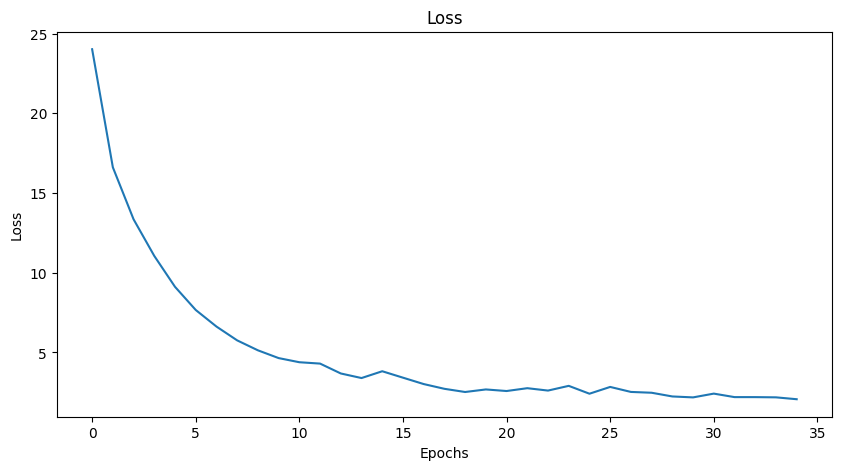

<IPython.core.display.Javascript object>

In [9]:
# plot the loss
fig = plt.figure(figsize=(10, 5))
plt.plot(result.history["loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Predictions


In [62]:
ids = test["cfips"].unique()
predictions = np.zeros((len(ids), 8))
test_df = timeseries[timeseries["target_date"] == timeseries["target_date"].max()].drop(
    ["target_date", "POPESTIMATE2021", "active", "cfips"], axis=1
)

<IPython.core.display.Javascript object>

In [63]:
test_df.head()

,target,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
14,3.463856,3.193804,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,...,3.286307,3.296781,3.334431,3.336785,3.372082,3.313253,3.346197,3.437971,3.423852,3.442677
29,8.359798,8.329126,8.263252,8.224466,8.011045,7.909001,7.978031,8.032654,8.061466,8.077073,...,7.930010,7.733397,7.823300,7.945311,7.979170,7.907365,8.507496,8.573463,8.491150,8.341701
44,1.232074,1.037059,1.032144,1.032144,1.111998,1.072105,1.057146,1.102025,1.097038,1.107011,...,1.151890,1.186629,1.206827,1.196728,1.191678,1.186629,1.191678,1.216926,1.196728,1.206827
59,1.287240,1.326394,1.320797,1.309604,1.310044,1.287650,1.287650,1.259657,1.259657,1.237263,...,1.209271,1.214165,1.236650,1.264755,1.253513,1.247892,1.275998,1.326588,1.292861,1.315346
74,1.831783,1.641125,1.641125,1.613962,1.612029,1.688793,1.700081,1.702339,1.720401,1.713628,...,1.752009,1.752923,1.777708,1.797986,1.764189,1.748417,1.773202,1.831783,1.836289,1.852060


<IPython.core.display.Javascript object>

In [64]:
test_df[24] =test_df["target"]
test_df.drop(["target","0"], axis=1, inplace=True)
test_df.columns = range(0,24)
test_df.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
14,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,...,3.296781,3.334431,3.336785,3.372082,3.313253,3.346197,3.437971,3.423852,3.442677,3.463856
29,8.263252,8.224466,8.011045,7.909001,7.978031,8.032654,8.061466,8.077073,7.984033,7.918605,...,7.733397,7.823300,7.945311,7.979170,7.907365,8.507496,8.573463,8.491150,8.341701,8.359798
44,1.032144,1.032144,1.111998,1.072105,1.057146,1.102025,1.097038,1.107011,1.146903,1.156876,...,1.186629,1.206827,1.196728,1.191678,1.186629,1.191678,1.216926,1.196728,1.206827,1.232074
59,1.320797,1.309604,1.310044,1.287650,1.287650,1.259657,1.259657,1.237263,1.237263,1.209271,...,1.214165,1.236650,1.264755,1.253513,1.247892,1.275998,1.326588,1.292861,1.315346,1.287240
74,1.641125,1.613962,1.612029,1.688793,1.700081,1.702339,1.720401,1.713628,1.715885,1.711370,...,1.752923,1.777708,1.797986,1.764189,1.748417,1.773202,1.831783,1.836289,1.852060,1.831783


<IPython.core.display.Javascript object>

In [65]:
test_df.shape

(3135, 24)

<IPython.core.display.Javascript object>

In [67]:
for i in range(8):
    predictions[:, i] = model.predict(test_df).reshape(-1)
    print(predictions.shape)
    test_df[i + 24] = predictions[:, i]
    test_df.drop(0, axis=1, inplace=True)
    test_df.columns = range(0, 24)

98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)
98/98 [==============================] - 0s 2ms/step
(3135, 8)


<IPython.core.display.Javascript object>

In [68]:
predictions.reshape(-1)

array([[3.43489909, 3.39776969, 3.40296626, ..., 3.33756328, 3.30029464,
        3.26265407],
       [8.4946003 , 8.65599918, 8.82422066, ..., 9.24257946, 9.36663342,
        9.50151253],
       [1.21758819, 1.20596004, 1.17799544, ..., 1.1039331 , 1.07463622,
        1.04813457],
       ...,
       [3.97005916, 3.92145038, 3.83392119, ..., 3.73021483, 3.68993735,
        3.65894675],
       [3.0994556 , 3.09966826, 3.16525245, ..., 3.0495317 , 3.00239539,
        2.96234012],
       [1.78332114, 1.78141189, 1.79390693, ..., 1.74162173, 1.72060275,
        1.70638728]])

<IPython.core.display.Javascript object>

In [71]:
test.sort_values(["cfips", "first_day_of_month"], inplace=True)

<IPython.core.display.Javascript object>

In [73]:
test["microbusiness_density"] = predictions.reshape(-1)

<IPython.core.display.Javascript object>

In [76]:
test.head(8)

,row_id,cfips,first_day_of_month,microbusiness_density
0,1001_2022-11-01,1001,2022-11-01,3.434899
3135,1001_2022-12-01,1001,2022-12-01,3.397770
6270,1001_2023-01-01,1001,2023-01-01,3.402966
9405,1001_2023-02-01,1001,2023-02-01,3.388385
12540,1001_2023-03-01,1001,2023-03-01,3.369950
15675,1001_2023-04-01,1001,2023-04-01,3.337563
18810,1001_2023-05-01,1001,2023-05-01,3.300295
21945,1001_2023-06-01,1001,2023-06-01,3.262654


<IPython.core.display.Javascript object>

In [77]:
result = test[["row_id", "microbusiness_density"]]
result.to_csv("../data/submissions/dl_test_1.csv", index=False)

<IPython.core.display.Javascript object>

### Plot some stuff

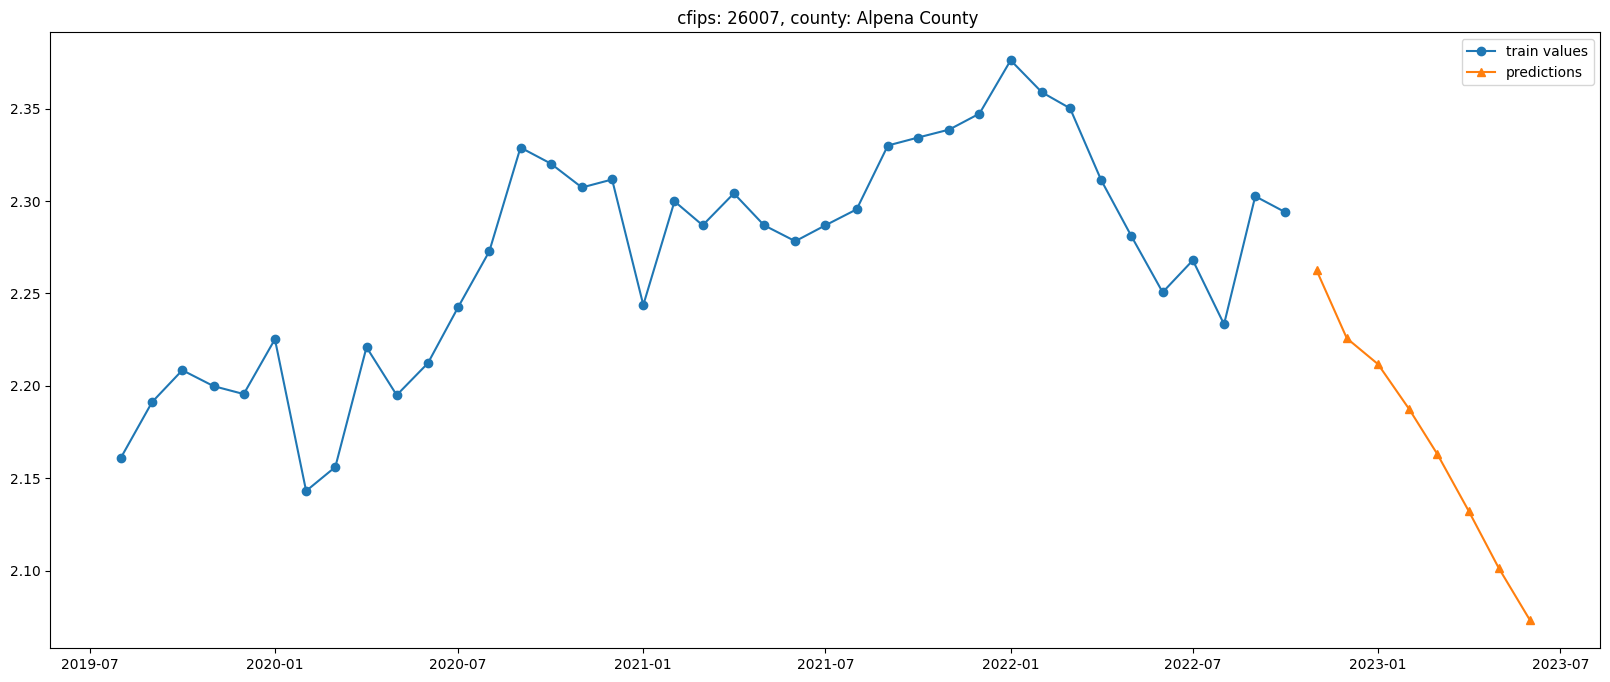

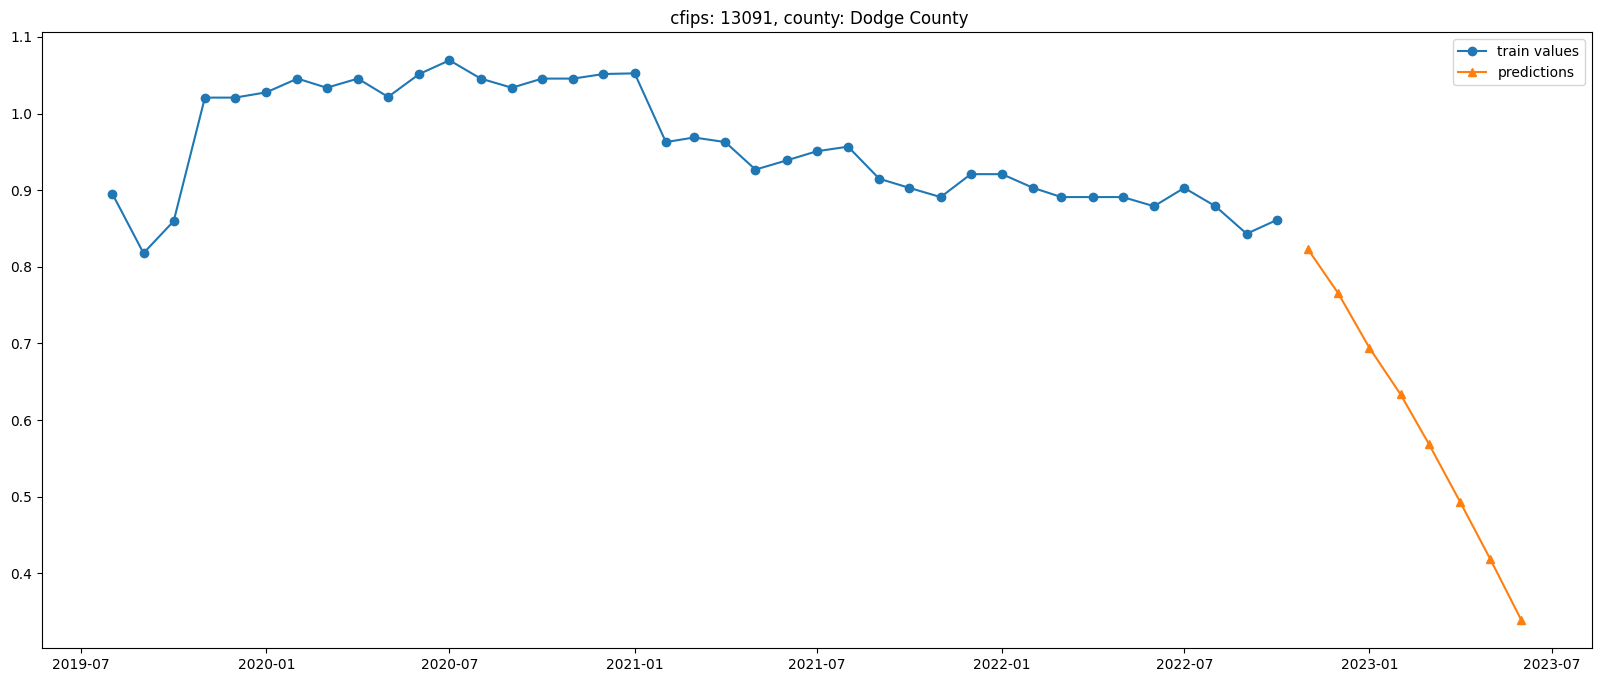

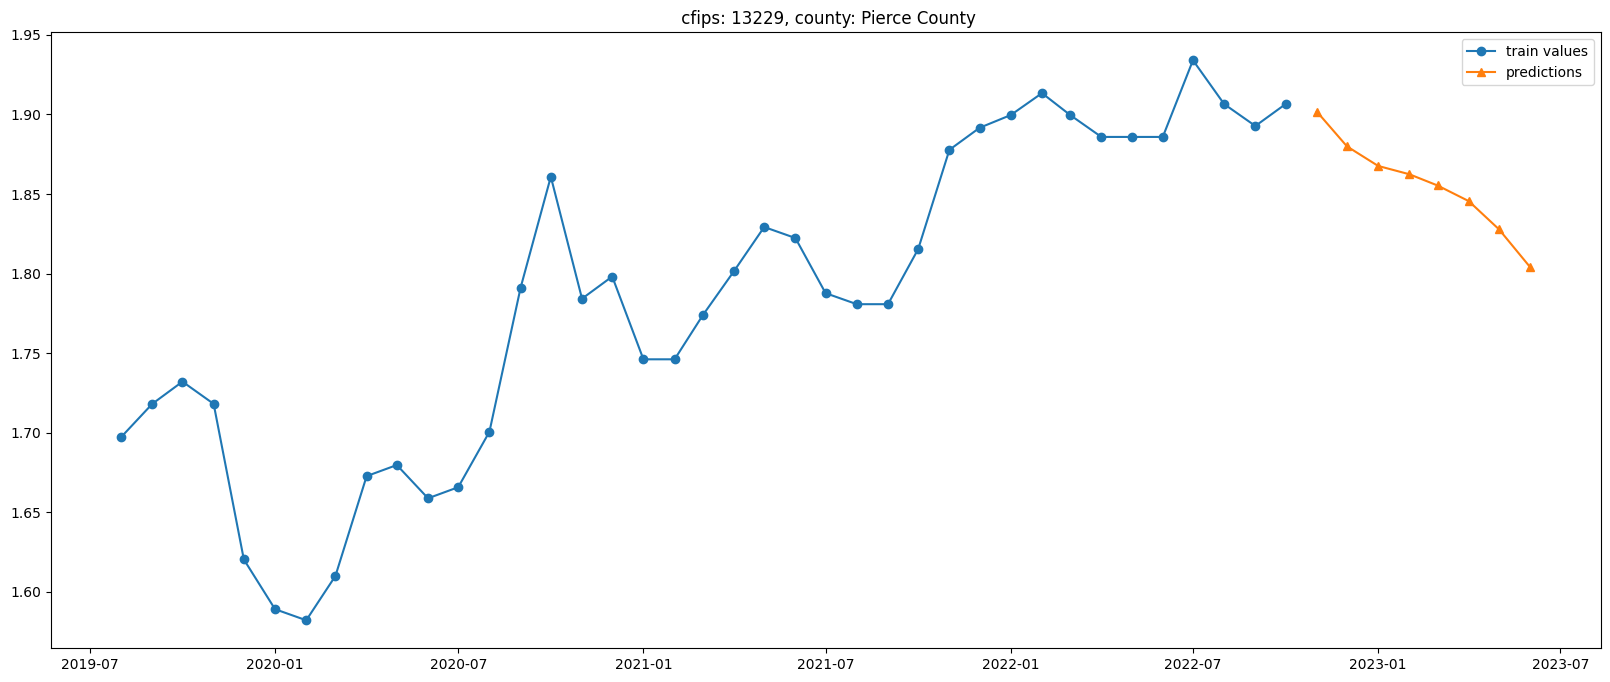

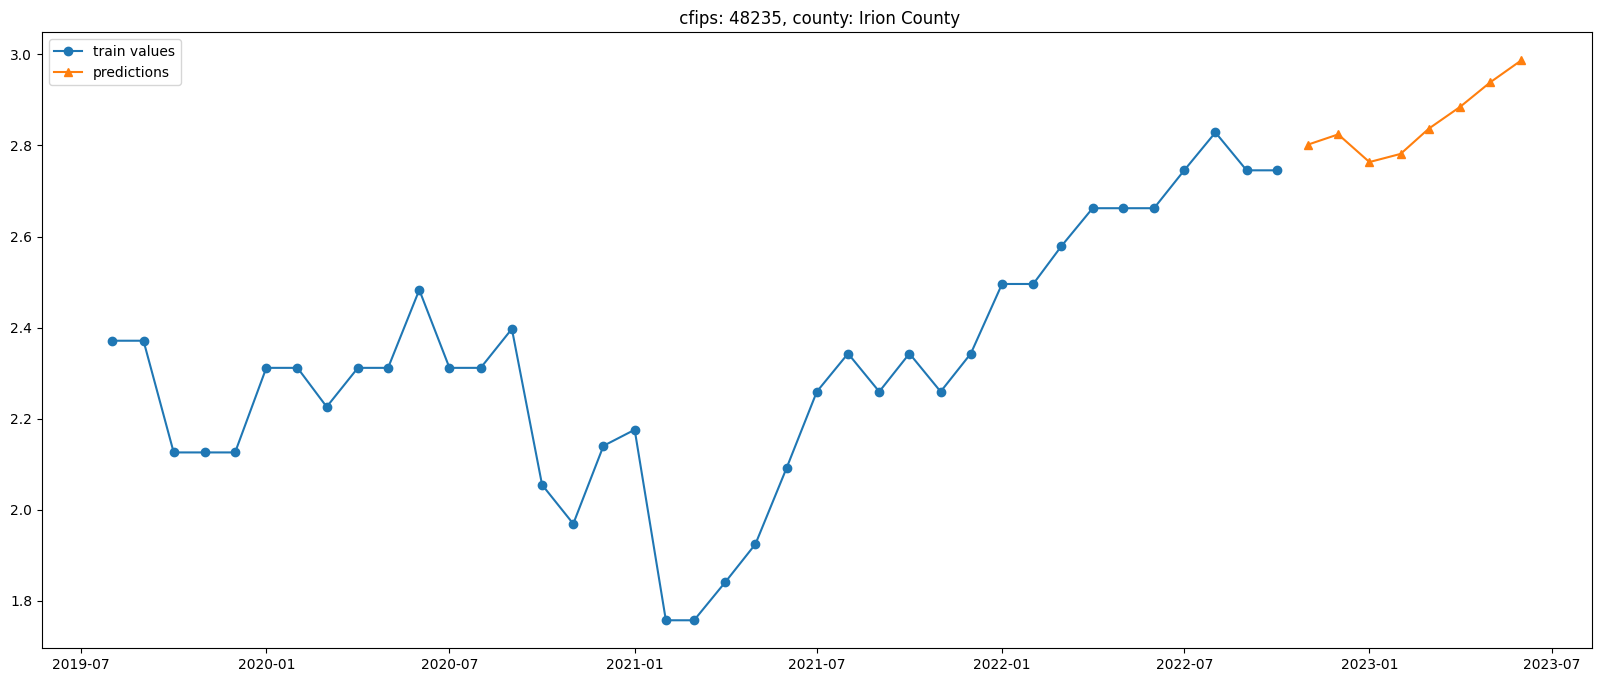

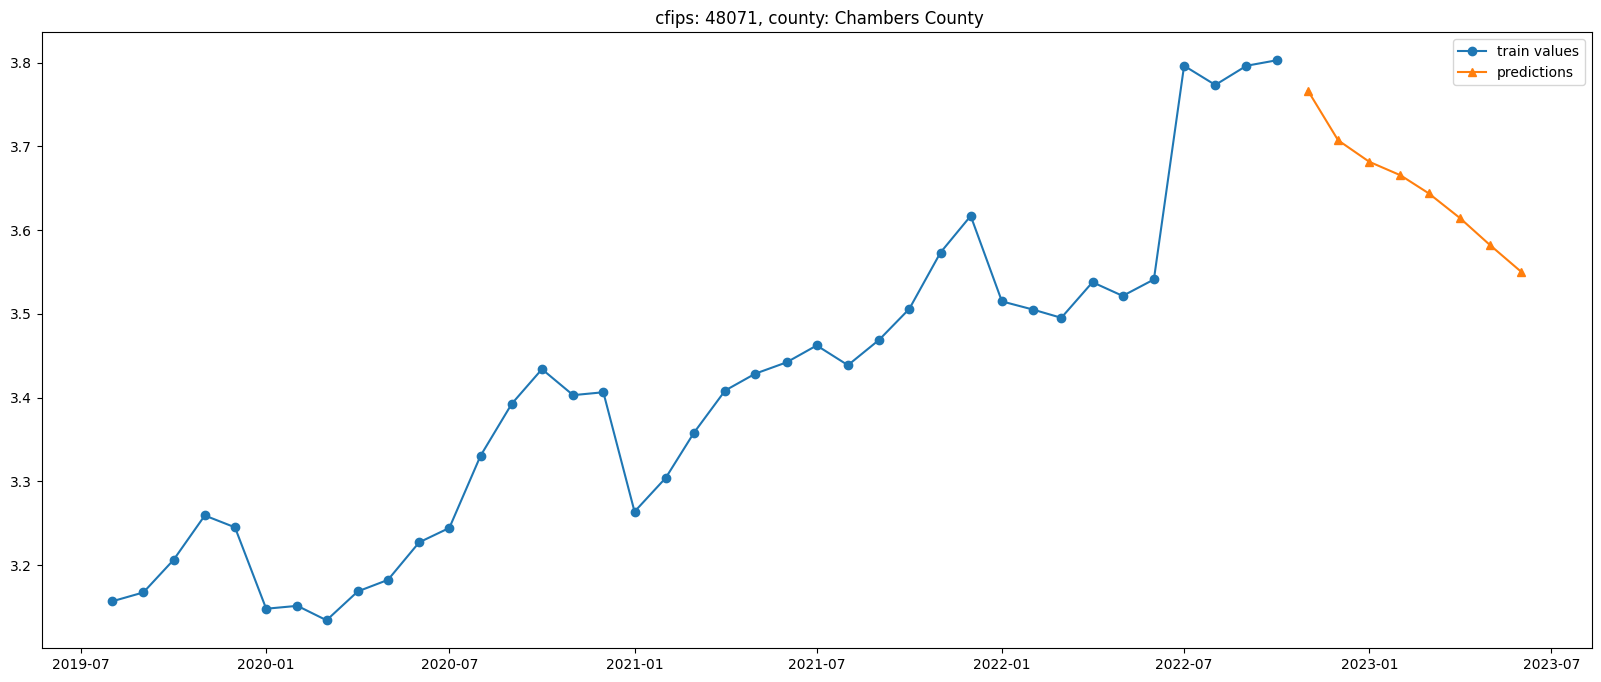

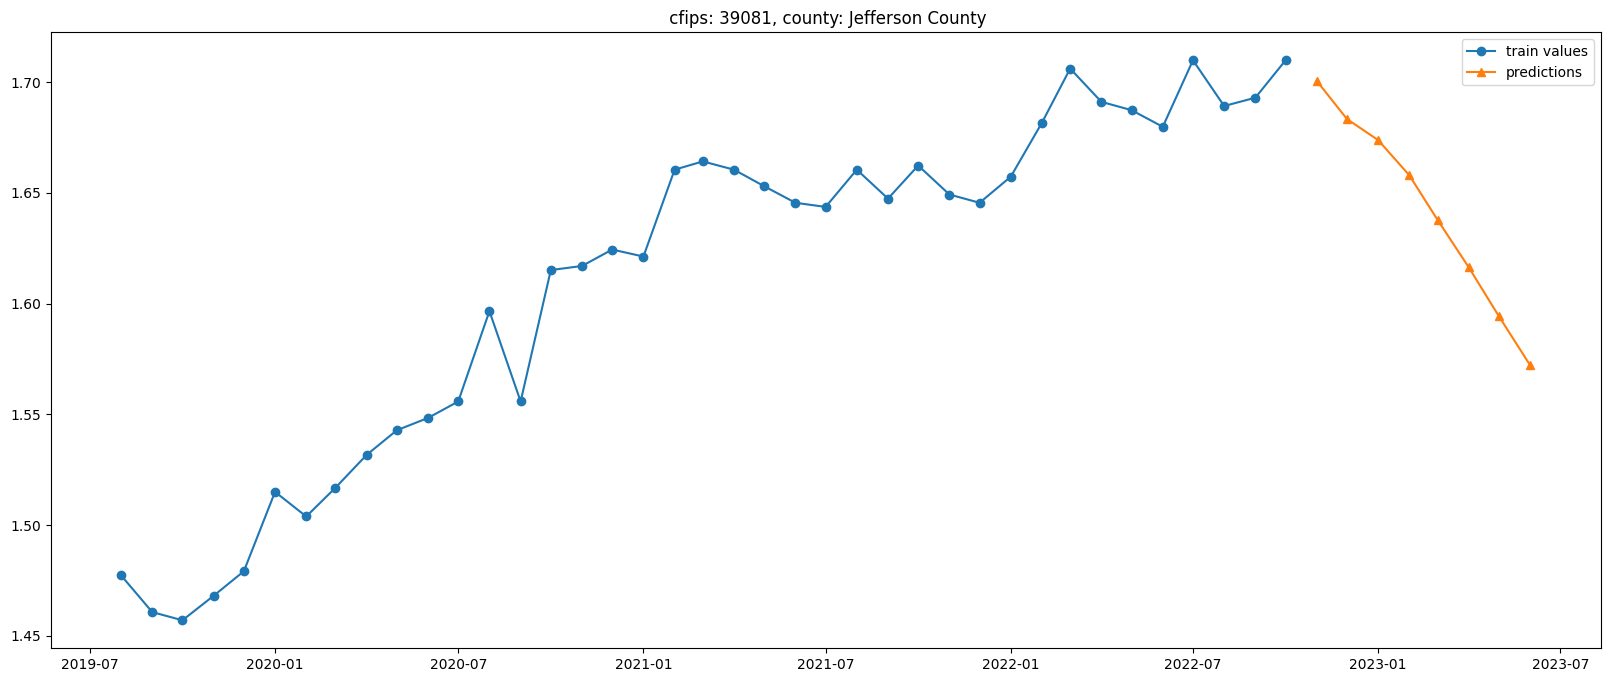

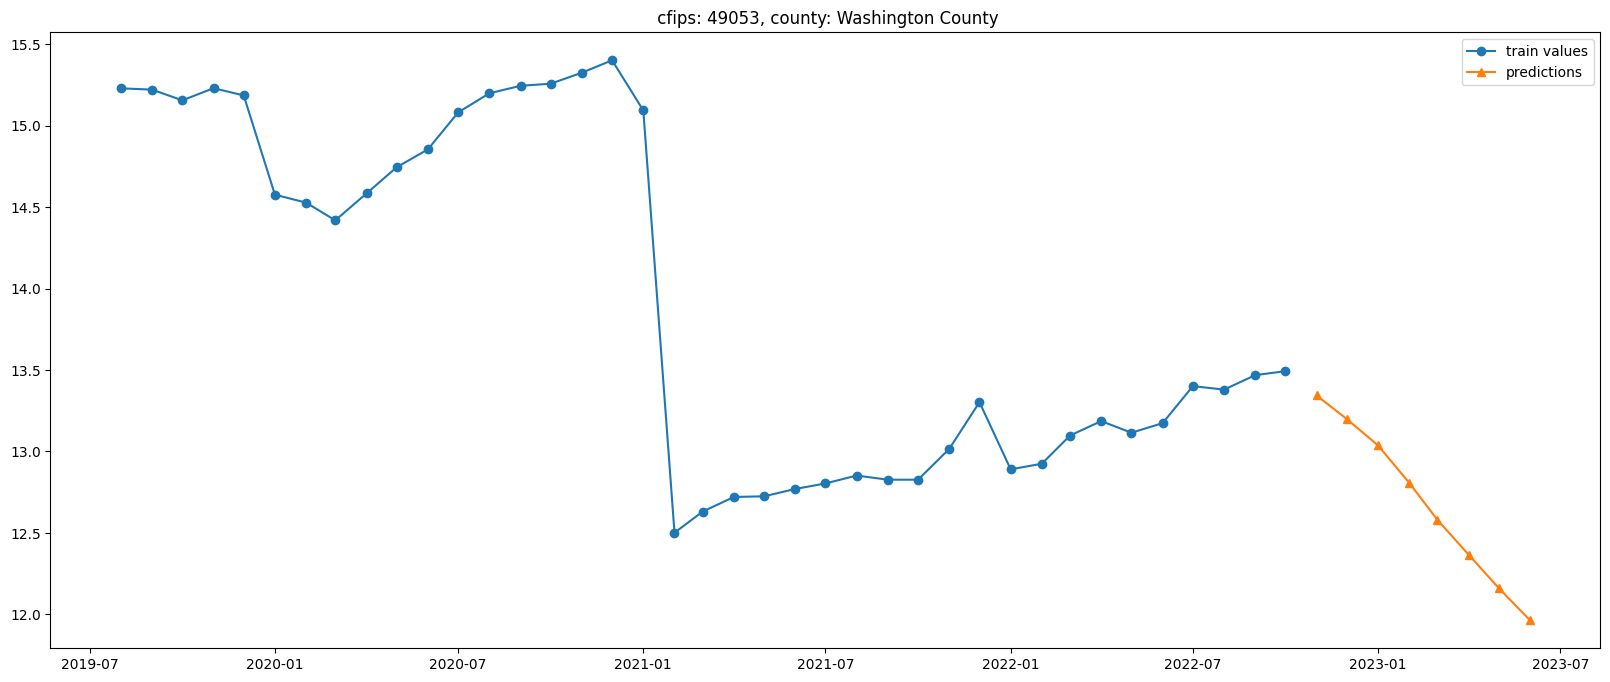

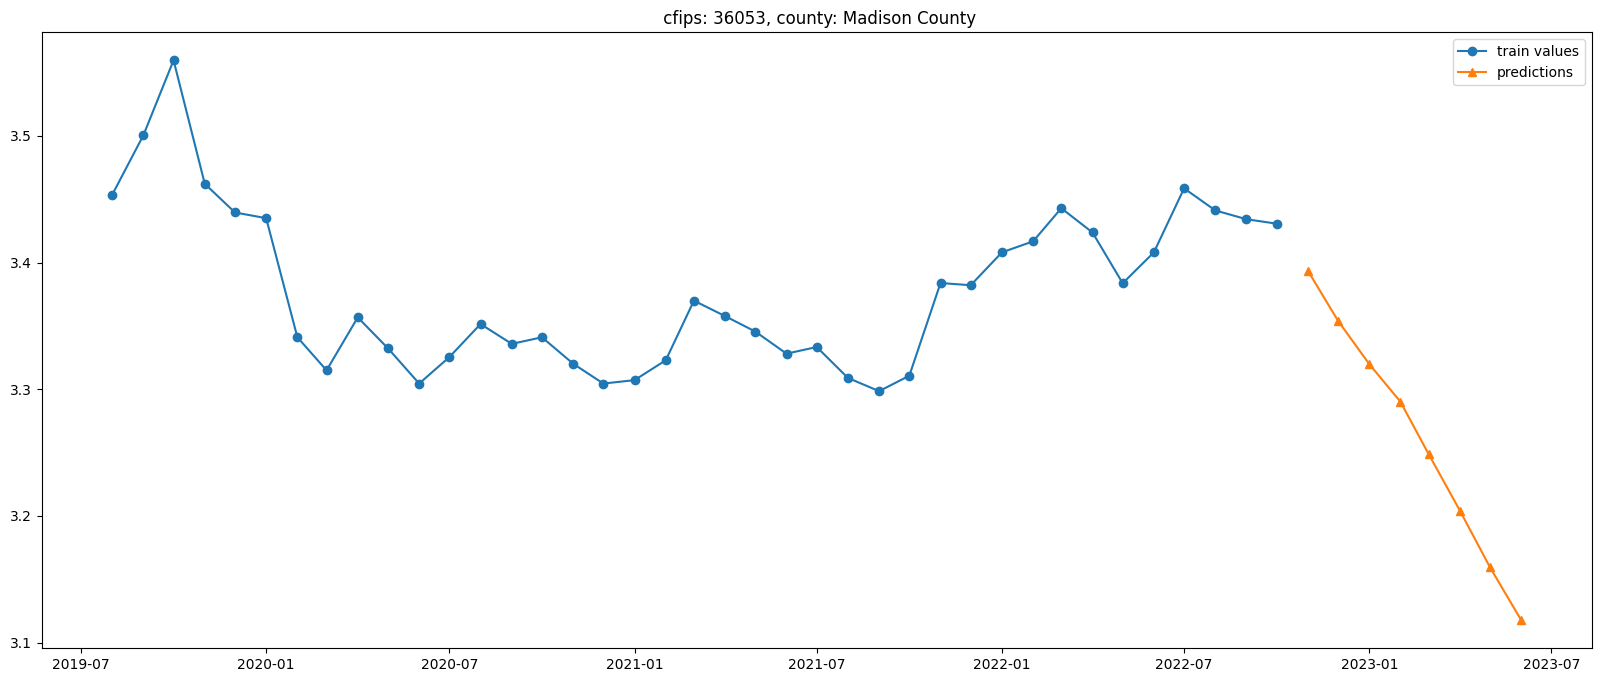

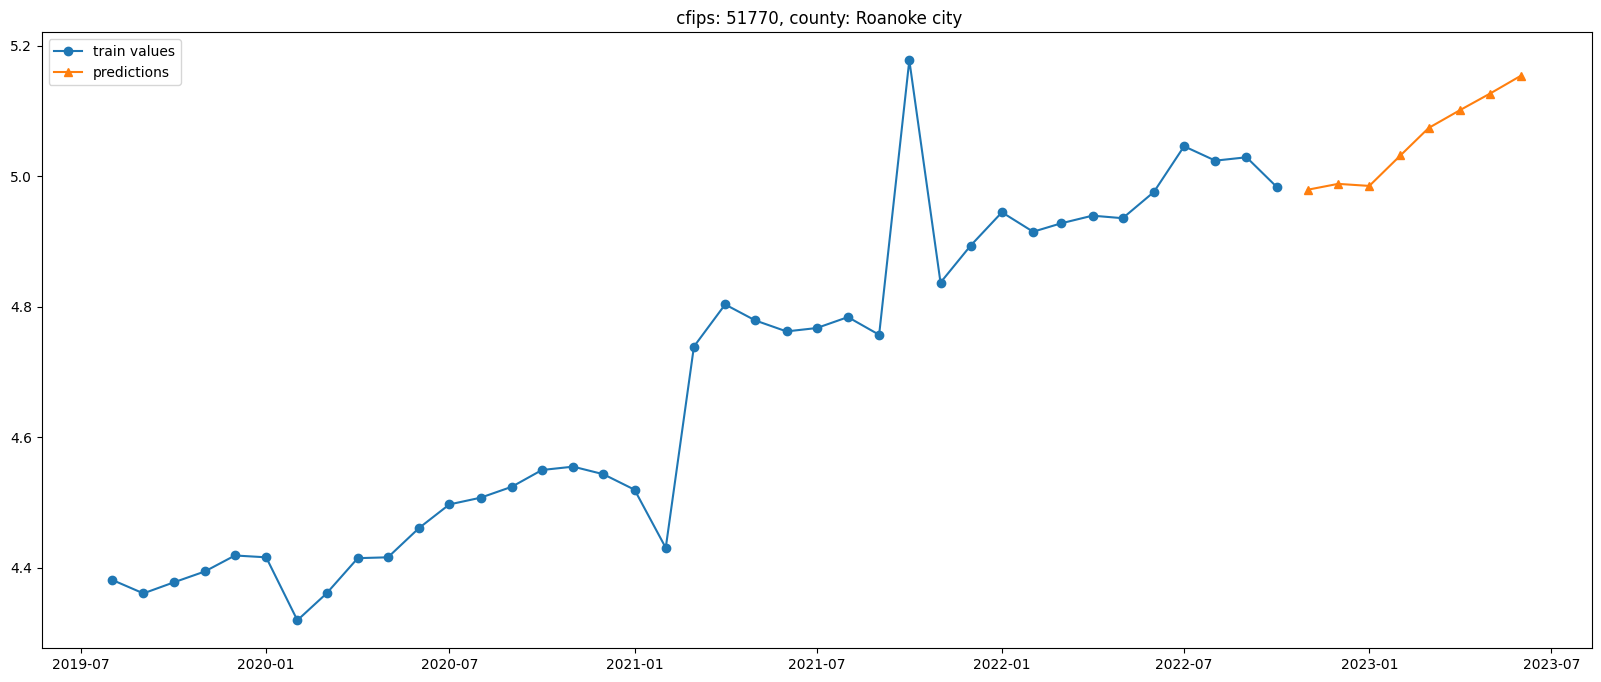

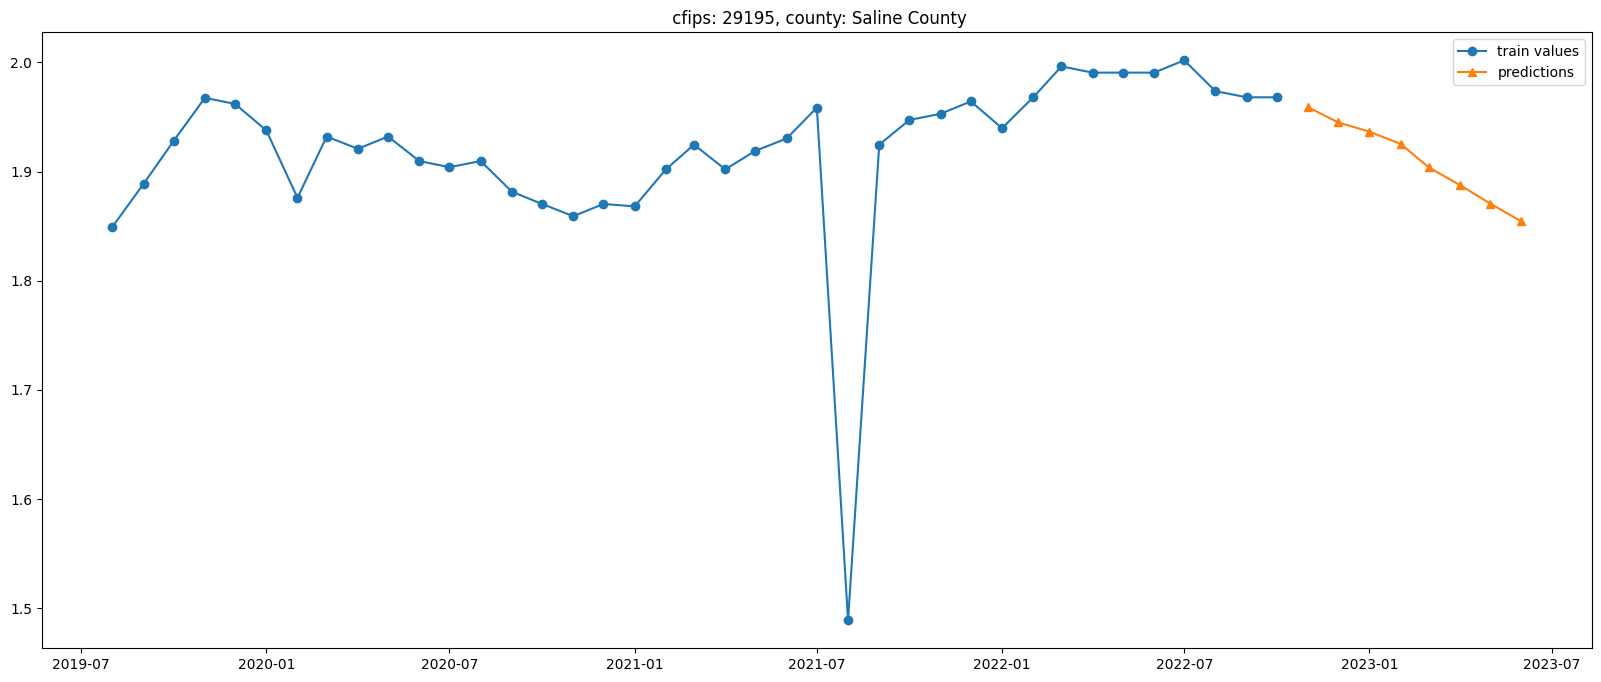

<IPython.core.display.Javascript object>

In [88]:
for i in range(10):
    c = np.random.choice(ids)
    plot_df = train[train["cfips"] == c].copy()
    test_plot = test[test["cfips"] == c].copy()
    plot_df["first_day_of_month"]= pd.to_datetime(plot_df["first_day_of_month"])
    test_plot["first_day_of_month"]= pd.to_datetime(test_plot["first_day_of_month"])
    last_target = plot_df["microbusiness_density"].values[-1]

    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    plt.plot(
        plot_df["first_day_of_month"],
        plot_df["microbusiness_density"],
        "-o",
        label="train values",)
    plt.plot(
    test_plot["first_day_of_month"], test_plot["microbusiness_density"], "-^", label="predictions"
    )
    plt.title(f" cfips: {c}, county: {plot_df['county'].values[0]}")
    plt.legend()
    plt.show()